In [341]:
#MODEL 5 and MODEL 6-CCC and ROA/ROS

# Install all the required libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from linearmodels.panel import PooledOLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from linearmodels.panel import PanelOLS, RandomEffects
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_breusch_godfrey


In [342]:
#Import the file for analysis
excel_file3='Final_For ELI & analysis2.xlsx'
csv_file3='for_eli1.csv'
df3=pd.read_excel(excel_file3)
df3.to_csv(csv_file3, index=False)

In [343]:
# Check the number of rows and type of data
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6011 entries, 0 to 6010
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PrimaryUKSIC2007code    6011 non-null   int64  
 1   Unique code             6011 non-null   int64  
 2   Company_name            6011 non-null   object 
 3   BvDIDnumber             6011 non-null   object 
 4   Index1                  6011 non-null   int64  
 5   ccc                     5941 non-null   float64
 6   No. of employees        6011 non-null   int64  
 7   Turnover                6011 non-null   float64
 8   Average inventory       6011 non-null   float64
 9   Firmsize                6011 non-null   float64
 10  log_Tasset              6011 non-null   float64
 11  ROA                     6011 non-null   float64
 12  ROS                     6011 non-null   float64
 13  Profit                  6011 non-null   float64
 14  Inventory_turnover      6011 non-null   

In [344]:
# Descriptive statistics of the data
df3.describe()

,PrimaryUKSIC2007code,Unique code,Index1,ccc,No. of employees,Turnover,Average inventory,Firmsize,log_Tasset,ROA,...,Inventory_to_saleratio,Financial_leverage,Liquidity,Capital_intensity,Firm_growth,Short_term_financing,Asset_tangibility,Firm_age_,Average_fixed_assets,log_fasset
count,6011.000000,6.011000e+03,6011.000000,5941.000000,6011.000000,6.011000e+03,6.011000e+03,6.011000e+03,6011.000000,6011.000000,...,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6.011000e+03,6011.000000
mean,21835.321910,2.218500e+07,5.500749,87.268762,808.602229,2.131982e+05,3.956926e+04,3.702343e+05,4.379554,5.382080,...,0.121120,0.261798,1.748246,0.808001,0.064578,0.427383,0.384394,35.171852,2.342587e+05,3.920703
std,8153.497473,1.705788e+08,2.872868,106.722121,5377.975125,1.662658e+06,3.362357e+05,3.544926e+06,0.599165,8.034841,...,0.145782,0.194733,1.297759,0.810378,0.205036,0.181229,0.188969,25.726682,2.401786e+06,0.701197
min,8120.000000,1.100000e+01,1.000000,-79.111117,3.000000,3.391782e+03,1.045720e+02,1.881905e+03,3.274598,-80.870268,...,0.004676,0.000759,0.075631,0.146988,-0.784855,0.031133,0.000731,1.000000,1.366000e+02,2.135451
25%,16100.000000,2.200000e+01,3.000000,41.123182,112.000000,1.603978e+04,1.174202e+03,1.020178e+04,4.008676,1.682199,...,0.053838,0.114256,1.096934,0.488921,-0.025924,0.297980,0.238107,17.000000,3.273000e+03,3.514946
50%,22290.000000,5.200000e+01,6.000000,70.275435,179.000000,2.582000e+04,2.564000e+03,1.708300e+04,4.232564,4.796452,...,0.093647,0.226090,1.440554,0.636324,0.049540,0.411233,0.373406,29.000000,6.212008e+03,3.793232
75%,28220.000000,7.200000e+01,8.000000,105.156783,309.000000,5.171080e+04,5.460364e+03,3.486525e+04,4.542393,8.834691,...,0.148332,0.372368,1.991514,0.869706,0.135355,0.547365,0.513404,44.000000,1.423181e+04,4.153260
max,46900.000000,1.333537e+09,10.000000,1989.505993,101192.000000,3.411400e+07,5.971500e+06,8.043100e+07,7.905423,63.773807,...,2.310598,1.958235,23.718448,14.802047,4.093515,1.366549,0.946401,138.000000,4.211530e+07,7.624440


In [345]:
# Descriptive statistics of the data
check_descriptive = ['ROA','ROS','Inventory_turnover','Inventory_to_saleratio','ccc','log_Tasset','Firm_growth', 'Financial_leverage', 'Liquidity', 'Capital_intensity','Short_term_financing','Asset_tangibility','Firm_age_']
df3[check_descriptive].describe()

,ROA,ROS,Inventory_turnover,Inventory_to_saleratio,ccc,log_Tasset,Firm_growth,Financial_leverage,Liquidity,Capital_intensity,Short_term_financing,Asset_tangibility,Firm_age_
count,6011.000000,6011.000000,6011.000000,6011.000000,5941.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000
mean,5.382080,5.118106,12.472601,0.121120,87.268762,4.379554,0.064578,0.261798,1.748246,0.808001,0.427383,0.384394,35.171852
std,8.034841,7.376124,14.724523,0.145782,106.722121,0.599165,0.205036,0.194733,1.297759,0.810378,0.181229,0.188969,25.726682
min,-80.870268,-69.392284,0.181850,0.004676,-79.111117,3.274598,-0.784855,0.000759,0.075631,0.146988,0.031133,0.000731,1.000000
25%,1.682199,1.896034,4.717131,0.053838,41.123182,4.008676,-0.025924,0.114256,1.096934,0.488921,0.297980,0.238107,17.000000
50%,4.796452,4.307933,7.836578,0.093647,70.275435,4.232564,0.049540,0.226090,1.440554,0.636324,0.411233,0.373406,29.000000
75%,8.834691,7.564467,13.474180,0.148332,105.156783,4.542393,0.135355,0.372368,1.991514,0.869706,0.547365,0.513404,44.000000
max,63.773807,61.872910,165.767768,2.310598,1989.505993,7.905423,4.093515,1.958235,23.718448,14.802047,1.366549,0.946401,138.000000


In [346]:
descriptive_stats = df3[check_descriptive].describe()

# To save this new DataFrame to an Excel file
descriptive_stats.to_excel("descriptive_stats.xlsx")

In [348]:
#Drop missing values in vairbales other than CCC

df3 = df3.dropna(subset=['ccc'])


In [349]:
# Check the number of rows and type of data
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5941 entries, 0 to 6010
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PrimaryUKSIC2007code    5941 non-null   int64  
 1   Unique code             5941 non-null   int64  
 2   Company_name            5941 non-null   object 
 3   BvDIDnumber             5941 non-null   object 
 4   Index1                  5941 non-null   int64  
 5   ccc                     5941 non-null   float64
 6   No. of employees        5941 non-null   int64  
 7   Turnover                5941 non-null   float64
 8   Average inventory       5941 non-null   float64
 9   Firmsize                5941 non-null   float64
 10  log_Tasset              5941 non-null   float64
 11  ROA                     5941 non-null   float64
 12  ROS                     5941 non-null   float64
 13  Profit                  5941 non-null   float64
 14  Inventory_turnover      5941 non-null   

In [350]:
# Correlation analysis
check_corr = ['ccc','Inventory_to_saleratio','log_Tasset','Firm_growth', 'Financial_leverage', 'Liquidity', 'Capital_intensity','Short_term_financing','Asset_tangibility','Firm_age_']
m5_corr=df3[check_corr].corr()
m5_corr.to_excel("m5_corr.xlsx")
m5_corr

,ccc,Inventory_to_saleratio,log_Tasset,Firm_growth,Financial_leverage,Liquidity,Capital_intensity,Short_term_financing,Asset_tangibility,Firm_age_
ccc,1.000000,0.920996,0.289980,-0.049571,0.030752,0.413358,0.544336,-0.229589,-0.074635,0.027552
Inventory_to_saleratio,0.920996,1.000000,0.259267,-0.069859,0.041256,0.413294,0.503389,-0.192362,-0.085238,0.052821
log_Tasset,0.289980,0.259267,1.000000,-0.022453,0.135268,0.113024,0.498184,-0.274921,0.307669,0.228665
Firm_growth,-0.049571,-0.069859,-0.022453,1.000000,-0.000700,-0.055428,-0.120012,0.063902,-0.023562,-0.074231
Financial_leverage,0.030752,0.041256,0.135268,-0.000700,1.000000,-0.275033,0.174632,0.281671,0.249353,-0.092167
Liquidity,0.413358,0.413294,0.113024,-0.055428,-0.275033,1.000000,0.259531,-0.554418,-0.274052,0.087825
Capital_intensity,0.544336,0.503389,0.498184,-0.120012,0.174632,0.259531,1.000000,-0.357892,0.327511,0.082286
Short_term_financing,-0.229589,-0.192362,-0.274921,0.063902,0.281671,-0.554418,-0.357892,1.000000,-0.304410,-0.182275
Asset_tangibility,-0.074635,-0.085238,0.307669,-0.023562,0.249353,-0.274052,0.327511,-0.304410,1.000000,0.045334
Firm_age_,0.027552,0.052821,0.228665,-0.074231,-0.092167,0.087825,0.082286,-0.182275,0.045334,1.000000


In [351]:
import pandas as pd
from scipy.stats.mstats import winsorize

# Winsorise the data to remove outliers 
# Name a variable to store the columns to be winsorised
cols_to_winsorize = ['ccc','No. of employees','Turnover', 'Average inventory', 'Firmsize', 
                     'log_Tasset', 'ROA', 'ROS','Profit','Inventory_turnover', 
                     'Inventory_to_saleratio', 'Financial_leverage', 'Liquidity', 
                     'Capital_intensity', 'Firm_growth', 'Short_term_financing',
                     'Asset_tangibility', 'Average_fixed_assets','Firm_age_', 
                     'log_fasset']
#Loop the columns to winsorise
for col in cols_to_winsorize:
    df3[col] = winsorize(df3[col], limits=[0.05, 0.05])

# Print the dataframe to check the result
df3

,PrimaryUKSIC2007code,Unique code,Company_name,BvDIDnumber,Index1,ccc,No. of employees,Turnover,Average inventory,Firmsize,...,Financial_leverage,Liquidity,Capital_intensity,Firm_growth,Short_term_financing,Asset_tangibility,Date of incorporation,Firm_age_,Average_fixed_assets,log_fasset
0,11010,21,DIAGEO PLC,GB00023307,1,186.323130,1426,337916.000,38450.0000,334670.000,...,0.460896,1.602492,1.694085,0.083475,0.223516,0.641818,21/10/1886,92,172286.8000,5.236252
1,11010,21,DIAGEO PLC,GB00023307,2,186.323130,1426,337916.000,38450.0000,334670.000,...,0.503933,1.765856,1.694085,-0.193661,0.195028,0.655608,21/10/1886,92,172286.8000,5.236252
2,11010,21,DIAGEO PLC,GB00023307,3,186.323130,1426,337916.000,38450.0000,334670.000,...,0.401169,1.338426,1.581087,0.046766,0.223767,0.700505,21/10/1886,92,172286.8000,5.236252
3,11010,21,DIAGEO PLC,GB00023307,4,186.323130,1426,337916.000,38450.0000,334670.000,...,0.338449,1.366509,1.588623,0.017555,0.214033,0.707521,21/10/1886,92,172286.8000,5.236252
4,11010,21,DIAGEO PLC,GB00023307,5,186.323130,1426,337916.000,38450.0000,334670.000,...,0.319780,1.299099,1.581208,0.158110,0.230865,0.700083,21/10/1886,92,172286.8000,5.236252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6006,17211,72,SIMPAC (HOLDINGS) LIMITED,GBSC375176,6,65.436737,118,25328.551,2188.6085,10466.801,...,0.049356,1.973843,0.414362,-0.141636,0.401610,0.207285,40256,8,2106.1912,3.323498
6007,17211,72,SIMPAC (HOLDINGS) LIMITED,GBSC375176,7,62.883773,118,29507.950,2471.4505,10523.595,...,0.072644,1.811557,0.377385,-0.191525,0.449404,0.185880,40256,8,2106.1912,3.323498
6008,17211,72,SIMPAC (HOLDINGS) LIMITED,GBSC375176,8,54.823271,119,36498.267,2715.7990,11748.096,...,0.134726,1.681820,0.330475,0.026884,0.510204,0.141929,40256,8,2106.1912,3.323498
6009,17211,72,SIMPAC (HOLDINGS) LIMITED,GBSC375176,9,58.328332,125,35542.721,2991.3355,12375.407,...,0.190395,1.716791,0.339144,0.032542,0.513190,0.118961,40256,8,2106.1912,3.323498


In [353]:
# Calculate Variance inflation index(VIF) for each variable to get Multicollinearity
vif = pd.DataFrame()

#Store the variables to check for Multicollinearity
exog_vars = ['ccc','Firm_growth', 'Financial_leverage', 'Liquidity', 'Capital_intensity','Short_term_financing','Asset_tangibility','Firm_age_']

vif["variables"] = exog_vars
vif["VIF"] = [variance_inflation_factor(df3[exog_vars].values, i) for i in range(df3[exog_vars].shape[1])]

#Print the results
print(vif)


              variables        VIF
0                   ccc   5.346182
1           Firm_growth   1.232202
2    Financial_leverage   4.766345
3             Liquidity   5.747281
4     Capital_intensity  10.535723
5  Short_term_financing   4.869569
6     Asset_tangibility   7.222382
7             Firm_age_   3.372636


In [355]:
# Run PooledOLS regression 

df3.set_index(['BvDIDnumber', 'Index1'], inplace=True)
dependent=df3['ROA']
independent=sm.add_constant(df3[['ccc','Firm_growth', 'Financial_leverage', 'Liquidity','Short_term_financing','Capital_intensity','Firm_age_']])
model=PooledOLS(dependent, independent)
pooledOLS_res=model.fit()

#Print the results
print(pooledOLS_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:                    ROA   R-squared:                        0.1655
Estimator:                  PooledOLS   R-squared (Between):              0.1981
No. Observations:                5941   R-squared (Within):               0.1379
Date:                Sun, Aug 13 2023   R-squared (Overall):              0.1655
Time:                        23:32:56   Log-likelihood                -1.826e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      168.15
Entities:                         595   P-value                           0.0000
Avg Obs:                       9.9849   Distribution:                  F(7,5933)
Min Obs:                       1.0000                                           
Max Obs:                      10.0000   F-statistic (robust):             168.15
                            

In [356]:



# Convert the result's summary to a DataFrame
summary_df = pd.DataFrame(pooledOLS_res.summary.tables[1].data)
header = summary_df.iloc[0]
summary_df = summary_df[1:]
summary_df.columns = header

# Extract R2 and F-statistic
r2 = pooledOLS_res.rsquared
f_statistic = pooledOLS_res.f_statistic.stat
f_pvalue = pooledOLS_res.f_statistic.pval

# Calculate adjusted R2
n = len(independent)
k = len(independent.columns) - 1  # Subtracting 1 because of the constant term
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Create a DataFrame for these stats
stats_df = pd.DataFrame({
    'Statistic': ['R-squared', 'Adjusted R-squared', 'F-statistic', 'F-statistic p-value'],
    'Value': [r2, adj_r2, f_statistic, f_pvalue]
})

# Write both DataFrames to the same Excel sheet
with pd.ExcelWriter("pooledOLS_results_m5.xlsx") as writer:
    summary_df.to_excel(writer, sheet_name="Results", startrow=1, header=True, index=False)
    stats_df.to_excel(writer, sheet_name="Results", startrow=len(summary_df) + 3, header=True, index=False)


In [357]:
#Lagrangie multiplier model_Heteroskedasticity test

from statsmodels.stats.diagnostic import het_white
residuals = pooledOLS_res.resids
white_test = het_white(residuals, independent)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
#Print the results LM test
print(dict(zip(labels, white_test)))

{'LM Statistic': 200.80711001864165, 'LM-Test p-value': 3.702359641090422e-25, 'F-Statistic': 5.902071373294067, 'F-Test p-value': 1.1444785501678194e-25}


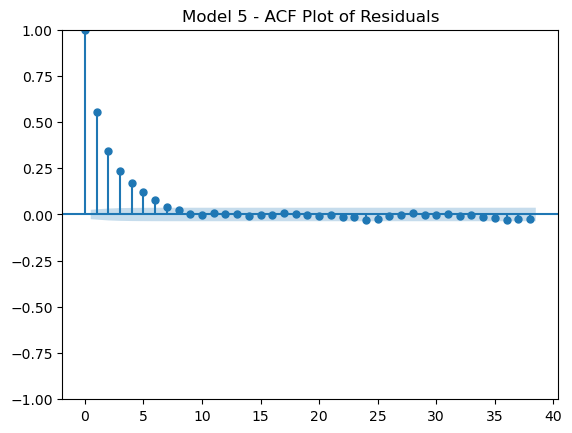

In [358]:
# ACF_Plots_ Autocorrelation test


from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residuals)
plt.title("Model 5 - ACF Plot of Residuals")
plt.show()

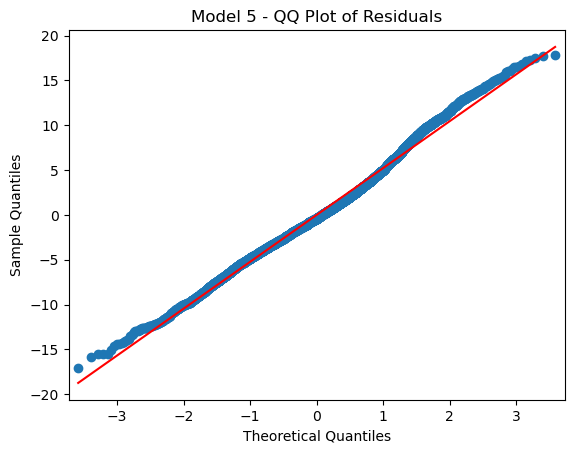

In [359]:
#QQ plots- Normality Test('s' indicates standardized line)

from statsmodels.graphics.gofplots import qqplot

qqplot(residuals, line='s')  # 's' indicates standardized line
plt.title("Model 5 - QQ Plot of Residuals")
plt.show()


In [360]:
# Check Omni bus values- Normality test

from scipy.stats import normaltest

statistic, p_value = normaltest(residuals)
print(f"Omnibus test statistic: {statistic}")
print(f"Omnibus test p-value: {p_value}")


Omnibus test statistic: 99.07505400428192
Omnibus test p-value: 3.0628475150281972e-22


In [361]:
 #Proceed with Panel data - Fixed & Random effect but check Hausman test first to choose the model
df3.reset_index(inplace=True)

df3.set_index(['BvDIDnumber','Index1'], inplace= True)
#Set the variables
exog_vars = ['ccc','Firm_growth','Financial_leverage', 'Liquidity','Short_term_financing']
exog = sm.add_constant(df3[exog_vars])
endog = df3['ROA']

# Run Fixed Effects Model
model_fe = PanelOLS(endog, exog, entity_effects=True,)
fe_res = model_fe.fit()
print(fe_res)

# Run Random Effects Model
model_re = RandomEffects(endog, exog)
re_res = model_re.fit()
print("Random Effects Model Summary:")
print(re_res)


# Run Hausman Test

# Obtain the residuals covariance matrix
fe_cov = fe_res.cov
re_cov = re_res.cov

# Obtain the parameters estimated
fe_params = fe_res.params
re_params = re_res.params

# Calculate the difference in coefficients
diff = fe_params - re_params

# Calculate the difference in covariance matrices
cov_diff = fe_cov - re_cov

# Calculate the Hausman test statistic (chi-squared statistic)
chi2_stat = diff.dot(np.linalg.inv(cov_diff)).dot(diff)

# Calculate the degrees of freedom
df = len(fe_params) - 1

# Calculate the p-value
p_value = stats.chi2.sf(chi2_stat, df)

#Print the results of the Hausman Test
print('Hausman Test:')
print('chi-squared statistic:', chi2_stat)
print('degrees of freedom :', df)
print('p-value:', p_value)


                          PanelOLS Estimation Summary                           
Dep. Variable:                    ROA   R-squared:                        0.1192
Estimator:                   PanelOLS   R-squared (Between):              0.1330
No. Observations:                5941   R-squared (Within):               0.1192
Date:                Sun, Aug 13 2023   R-squared (Overall):              0.1258
Time:                        23:32:58   Log-likelihood                -1.661e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      144.55
Entities:                         595   P-value                           0.0000
Avg Obs:                       9.9849   Distribution:                  F(5,5341)
Min Obs:                       1.0000                                           
Max Obs:                      10.0000   F-statistic (robust):             144.55
                            

In [362]:
# Since Hausman Test confirms, the Fixed effect model is appropriate model, Check Fixed effect tests
df3.reset_index(inplace=True)

df3.set_index(['BvDIDnumber','Index1'], inplace= True)
# Set the variables & define the dependent & independent variables
exog_vars = ['ccc','Firm_growth','Financial_leverage', 'Liquidity','Short_term_financing']
exog = sm.add_constant(df3[exog_vars])
endog = df3['ROA']

# Fixed Effects Model - Entity effect
model_fe = PanelOLS(endog, exog, entity_effects=True,)
fe_res = model_fe.fit()


# Fixed Effects Model- Time effect
model_te = PanelOLS(endog, exog, time_effects=True)
te_res = model_te.fit()


# Fixed Effects Model-Two-way effect
model_twe = PanelOLS(endog, exog, entity_effects=True, time_effects=True)
twe_res = model_twe.fit()

# Print Fixed Effects Model - Entity effect
print("Entity Fixed Effects Model Summary:")
print(fe_res)

# Print Fixed Effects Model- Time effect
print("\nTime Fixed Effects Model Summary:")
print(te_res)

# Print Fixed Effects Model- Two,way effect
print("\nTwo-Way Fixed Effects Model Summary:")
print(twe_res)




Entity Fixed Effects Model Summary:
                          PanelOLS Estimation Summary                           
Dep. Variable:                    ROA   R-squared:                        0.1192
Estimator:                   PanelOLS   R-squared (Between):              0.1330
No. Observations:                5941   R-squared (Within):               0.1192
Date:                Sun, Aug 13 2023   R-squared (Overall):              0.1258
Time:                        23:32:59   Log-likelihood                -1.661e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      144.55
Entities:                         595   P-value                           0.0000
Avg Obs:                       9.9849   Distribution:                  F(5,5341)
Min Obs:                       1.0000                                           
Max Obs:                      10.0000   F-statistic (robust):            

In [363]:
# Store the results into dataframe and convert to excel 

# Get the coefficients
fe_coeff = fe_res.params
te_coeff = te_res.params
twe_coeff = twe_res.params

# Get R-squared
fe_r2 = fe_res.rsquared
te_r2 = te_res.rsquared
twe_r2 = twe_res.rsquared

# Calculate Adjusted R-squared directly
fe_adj_r2 = 1 - (1-fe_r2)*(fe_res.nobs-1)/(fe_res.nobs-len(exog_vars)-1)
te_adj_r2 = 1 - (1-te_r2)*(te_res.nobs-1)/(te_res.nobs-len(exog_vars)-1)
twe_adj_r2 = 1 - (1-twe_r2)*(twe_res.nobs-1)/(twe_res.nobs-len(exog_vars)-1)

# Get number of observations
fe_nobs = fe_res.nobs
te_nobs = te_res.nobs
twe_nobs = twe_res.nobs

# Create a DataFrame
df_results = pd.DataFrame({'Entity FE': fe_coeff, 'Time FE': te_coeff, 'Two-Way FE': twe_coeff})

# Append R-squared, Adjusted R-squared, and Number of observations
df_results = df_results.append(pd.Series({'Entity FE': fe_r2, 'Time FE': te_r2, 'Two-Way FE': twe_r2}, name='R-squared'))
df_results = df_results.append(pd.Series({'Entity FE': fe_adj_r2, 'Time FE': te_adj_r2, 'Two-Way FE': twe_adj_r2}, name='Adjusted R-squared'))
df_results = df_results.append(pd.Series({'Entity FE': fe_nobs, 'Time FE': te_nobs, 'Two-Way FE': twe_nobs}, name='Number of Obs.'))

print(df_results)
df_results.to_excel('model-5-fixed_effect.xlsx')

                        Entity FE      Time FE   Two-Way FE
const                    8.989376     4.114098     8.363612
ccc                     -0.002901    -0.000960     0.000264
Firm_growth              8.046417     9.789271     8.170535
Financial_leverage     -10.190321    -7.885294   -10.392563
Liquidity                0.429671     1.380931     0.698206
Short_term_financing    -4.438791     1.392461    -4.473749
R-squared                0.119189     0.150356     0.126164
Adjusted R-squared       0.118447     0.149641     0.125428
Number of Obs.        5941.000000  5941.000000  5941.000000


/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_20580/3195058710.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(pd.Series({'Entity FE': fe_r2, 'Time FE': te_r2, 'Two-Way FE': twe_r2}, name='R-squared'))
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_20580/3195058710.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(pd.Series({'Entity FE': fe_adj_r2, 'Time FE': te_adj_r2, 'Two-Way FE': twe_adj_r2}, name='Adjusted R-squared'))
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_20580/3195058710.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(pd.Series({'Entity FE': fe_nobs, 'Time FE': te_nob

In [364]:
# Store the residuals of Two-way fixed effect into a variable
residuals = twe_res.resids

# Run the Breusch-Pagan test-Heteroskedasticity test
bp_test = het_breuschpagan(residuals, exog)
bp_test_result = {'lagrange_multiplier_stat': bp_test[0], 'p-value': bp_test[1], 
                  'f-value': bp_test[2], 'f p-value': bp_test[3]}
print('Breusch-Pagan test:')
print(bp_test_result)

# Run the Durbin-Watson test-Heteroskedasticity test
dw_test_result = durbin_watson(residuals)
print('Durbin-Watson test:')
print(f'DW statistic: {dw_test_result}')

# Run the Breuch- Gofrey test-Serial Correlation test

df3['residuals'] = twe_res.resids
df3['lag_residuals'] = df3.groupby(level='BvDIDnumber')['residuals'].shift(1)

# Drop NaN values from the dataframe
df3_cleaned = df3.dropna(subset=['residuals', 'lag_residuals'])

# Extract the dependent and independent variables from the cleaned dataframe
y = df3_cleaned['residuals']
X = df3_cleaned[['lag_residuals']]

# Using PanelOLS for fixed effect regression
model = PanelOLS(y, X, entity_effects=True, time_effects=True)
results = model.fit()

print('Breusch-Godfrey test:')
print(f'F-statistic: {results.f_statistic.stat}')
print(f'p-value: {results.f_statistic.pval}')






Breusch-Pagan test:
{'lagrange_multiplier_stat': 40.733338555112326, 'p-value': 1.0621561807024154e-07, 'f-value': 8.194625029553881, 'f p-value': 1.0095164958135071e-07}
Durbin-Watson test:
DW statistic: 1.4742347578190393
Breusch-Godfrey test:
F-statistic: 505.0963865265051
p-value: 1.1102230246251565e-16


In [365]:
# Run Two-Way Fixed Effects Model with robust standard errors
model_twe_robust = PanelOLS(endog, exog, entity_effects=True, time_effects=True)
twe_res_robust = model_twe_robust.fit(cov_type='clustered', cluster_entity=True)

# Print the results of Two-Way Fixed Effects Model with robust standard errors
print('Two-Way Fixed Effects Model:\n', twe_res.summary)
print('Two-Way Fixed Effects Model (Robust):\n', twe_res_robust.summary)


Two-Way Fixed Effects Model:
                           PanelOLS Estimation Summary                           
Dep. Variable:                    ROA   R-squared:                        0.1262
Estimator:                   PanelOLS   R-squared (Between):              0.1233
No. Observations:                5941   R-squared (Within):               0.1184
Date:                Sun, Aug 13 2023   R-squared (Overall):              0.1210
Time:                        23:32:59   Log-likelihood                -1.653e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      153.97
Entities:                         595   P-value                           0.0000
Avg Obs:                       9.9849   Distribution:                  F(5,5332)
Min Obs:                       1.0000                                           
Max Obs:                      10.0000   F-statistic (robust):             153.9

In [317]:
# Compare Plain Fixed effect two-way Fixed effect two-way with Robust standard error
print('Comparison of coefficient estimates:\n', 
      pd.DataFrame({'Model': twe_res.params, 'Model (Robust)': twe_res_robust.params}))

print('Comparison of standard errors:\n', 
      pd.DataFrame({'Model': twe_res.std_errors, 'Model (Robust)': twe_res_robust.std_errors}))



Comparison of coefficient estimates:
                           Model  Model (Robust)
const                  8.363612        8.363612
ccc                    0.000264        0.000264
Firm_growth            8.170535        8.170535
Financial_leverage   -10.392563      -10.392563
Liquidity              0.698206        0.698206
Short_term_financing  -4.473749       -4.473749
Comparison of standard errors:
                          Model  Model (Robust)
const                 0.777137        1.137132
ccc                   0.003423        0.005357
Firm_growth           0.444057        0.619113
Financial_leverage    0.687420        1.010447
Liquidity             0.221987        0.329504
Short_term_financing  1.019367        1.583545


In [366]:
#Calculate adjusted R2 to test Goodness of the test
twe_r2_robust = twe_res_robust.rsquared
twe_adj_r2_robust = 1 - (1-twe_r2_robust)*(twe_res_robust.nobs-1)/(twe_res_robust.nobs-len(exog_vars)-1)
twe_adj_r2_robust

0.12542832082833077

In [372]:
# Model 2 : Regression analysis for ROS and inventory turnover
excel_file6='Final_For ELI & analysis2.xlsx'
csv_file6='for_eli1.csv'
df3=pd.read_excel(excel_file6)
df3.to_csv(csv_file6, index=False)

In [373]:
check_corr = ['ROS','Inventory_to_saleratio','log_Tasset','Firm_growth', 'Financial_leverage', 'Liquidity', 'Capital_intensity','Short_term_financing','Asset_tangibility','Firm_age_']
m6_corr=df3[check_corr].corr()
m6_corr.to_excel("m6_corr.xlsx")
m6_corr

,ROS,Inventory_to_saleratio,log_Tasset,Firm_growth,Financial_leverage,Liquidity,Capital_intensity,Short_term_financing,Asset_tangibility,Firm_age_
ROS,1.000000,0.262235,0.193275,0.160255,-0.193069,0.253281,0.144053,-0.266405,-0.008565,0.033640
Inventory_to_saleratio,0.262235,1.000000,0.252714,-0.070961,0.039800,0.402208,0.414803,-0.191361,-0.084520,0.049811
log_Tasset,0.193275,0.252714,1.000000,-0.027273,0.133518,0.140570,0.470213,-0.286422,0.297310,0.232908
Firm_growth,0.160255,-0.070961,-0.027273,1.000000,-0.003047,-0.059102,-0.118030,0.066532,-0.023025,-0.075192
Financial_leverage,-0.193069,0.039800,0.133518,-0.003047,1.000000,-0.268337,0.158809,0.271576,0.245495,-0.090935
Liquidity,0.253281,0.402208,0.140570,-0.059102,-0.268337,1.000000,0.263287,-0.559486,-0.274720,0.088601
Capital_intensity,0.144053,0.414803,0.470213,-0.118030,0.158809,0.263287,1.000000,-0.321197,0.236656,0.100756
Short_term_financing,-0.266405,-0.191361,-0.286422,0.066532,0.271576,-0.559486,-0.321197,1.000000,-0.300462,-0.181022
Asset_tangibility,-0.008565,-0.084520,0.297310,-0.023025,0.245495,-0.274720,0.236656,-0.300462,1.000000,0.043730
Firm_age_,0.033640,0.049811,0.232908,-0.075192,-0.090935,0.088601,0.100756,-0.181022,0.043730,1.000000


In [374]:
import pandas as pd
from scipy.stats.mstats import winsorize

# assuming df is your dataframe
cols_to_winsorize = ['ccc','No. of employees','Turnover', 'Average inventory', 'Firmsize', 
                     'log_Tasset', 'ROA', 'ROS','Profit','Inventory_turnover', 
                     'Inventory_to_saleratio', 'Financial_leverage', 'Liquidity', 
                     'Capital_intensity', 'Firm_growth', 'Short_term_financing',
                     'Asset_tangibility', 'Average_fixed_assets','Firm_age_', 
                     'log_fasset']

for col in cols_to_winsorize:
    df3[col] = winsorize(df3[col], limits=[0.05, 0.05])

# print the dataframe to check the result
df3

,PrimaryUKSIC2007code,Unique code,Company_name,BvDIDnumber,Index1,ccc,No. of employees,Turnover,Average inventory,Firmsize,...,Financial_leverage,Liquidity,Capital_intensity,Firm_growth,Short_term_financing,Asset_tangibility,Date of incorporation,Firm_age_,Average_fixed_assets,log_fasset
0,11010,21,DIAGEO PLC,GB00023307,1,208.440201,1457,344214.000,38918.0000,351813.000,...,0.460896,1.602492,1.743787,0.083475,0.223516,0.641818,21/10/1886,92,172286.8000,5.236252
1,11010,21,DIAGEO PLC,GB00023307,2,208.440201,1457,344214.000,38918.0000,351813.000,...,0.503933,1.765856,1.743787,-0.196410,0.195028,0.655608,21/10/1886,92,172286.8000,5.236252
2,11010,21,DIAGEO PLC,GB00023307,3,208.440201,1457,344214.000,38918.0000,351813.000,...,0.401169,1.338426,1.581087,0.046766,0.223767,0.700505,21/10/1886,92,172286.8000,5.236252
3,11010,21,DIAGEO PLC,GB00023307,4,208.440201,1457,344214.000,38918.0000,351813.000,...,0.338449,1.366509,1.588623,0.017555,0.214033,0.707521,21/10/1886,92,172286.8000,5.236252
4,11010,21,DIAGEO PLC,GB00023307,5,208.440201,1457,344214.000,38918.0000,351813.000,...,0.319780,1.299099,1.581208,0.158110,0.230865,0.700083,21/10/1886,92,172286.8000,5.236252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6006,17211,72,SIMPAC (HOLDINGS) LIMITED,GBSC375176,6,65.436737,118,25328.551,2188.6085,10466.801,...,0.049356,1.973843,0.414362,-0.141636,0.401610,0.207285,40256,8,2106.1912,3.323498
6007,17211,72,SIMPAC (HOLDINGS) LIMITED,GBSC375176,7,62.883773,118,29507.950,2471.4505,10523.595,...,0.072644,1.811557,0.377385,-0.191525,0.449404,0.185880,40256,8,2106.1912,3.323498
6008,17211,72,SIMPAC (HOLDINGS) LIMITED,GBSC375176,8,54.823271,119,36498.267,2715.7990,11748.096,...,0.134726,1.681820,0.330475,0.026884,0.510204,0.141929,40256,8,2106.1912,3.323498
6009,17211,72,SIMPAC (HOLDINGS) LIMITED,GBSC375176,9,58.328332,125,35542.721,2991.3355,12375.407,...,0.190395,1.716791,0.339144,0.032542,0.513190,0.118961,40256,8,2106.1912,3.323498


In [375]:
#Ru a pooledOLS

df3.set_index(['BvDIDnumber', 'Index1'], inplace=True)
dependent=df3['ROS']
independent=sm.add_constant(df3[['ccc','Firm_growth','Financial_leverage', 'Liquidity','Short_term_financing','Capital_intensity','Firm_age_']])
model=PooledOLS(dependent, independent)
pooledOLS_res=model.fit()
print(pooledOLS_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:                    ROS   R-squared:                        0.2147
Estimator:                  PooledOLS   R-squared (Between):              0.3343
No. Observations:                6011   R-squared (Within):               0.0652
Date:                Sun, Aug 13 2023   R-squared (Overall):              0.2147
Time:                        23:37:20   Log-likelihood                -1.732e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      234.47
Entities:                         602   P-value                           0.0000
Avg Obs:                       9.9850   Distribution:                  F(7,6003)
Min Obs:                       1.0000                                           
Max Obs:                      10.0000   F-statistic (robust):             234.47
                            

In [376]:
import pandas as pd
import statsmodels.api as sm
from linearmodels.panel import PooledOLS



# Convert the result's summary to a DataFrame
summary_df = pd.DataFrame(pooledOLS_res.summary.tables[1].data)
header = summary_df.iloc[0]
summary_df = summary_df[1:]
summary_df.columns = header

# Extract R2 and F-statistic
r2 = pooledOLS_res.rsquared
f_statistic = pooledOLS_res.f_statistic.stat
f_pvalue = pooledOLS_res.f_statistic.pval

# Calculate adjusted R2
n = len(independent)
k = len(independent.columns) - 1  # Subtracting 1 because of the constant term
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Create a DataFrame for these stats
stats_df = pd.DataFrame({
    'Statistic': ['R-squared', 'Adjusted R-squared', 'F-statistic', 'F-statistic p-value'],
    'Value': [r2, adj_r2, f_statistic, f_pvalue]
})

# Write both DataFrames to the same Excel sheet
with pd.ExcelWriter("pooledOLS_results_m6.xlsx") as writer:
    summary_df.to_excel(writer, sheet_name="Results", startrow=1, header=True, index=False)
    stats_df.to_excel(writer, sheet_name="Results", startrow=len(summary_df) + 3, header=True, index=False)


In [377]:
#Lagrangie multiplier model_Heteroskedasticity test

from statsmodels.stats.diagnostic import het_white
residuals = pooledOLS_res.resids
white_test = het_white(residuals, independent)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'LM Statistic': 1177.7538361649147, 'LM-Test p-value': 1.0941533264257272e-224, 'F-Statistic': 41.599247808354264, 'F-Test p-value': 6.622224232913751e-252}


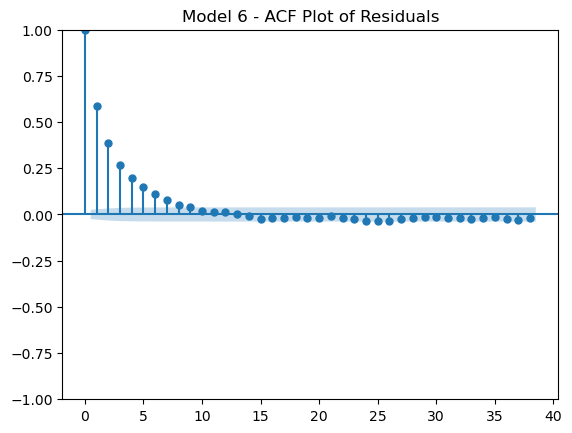

In [378]:
# ACF_Plots_ Autocorrelation test
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residuals)
plt.title("Model 6 - ACF Plot of Residuals")
plt.show()

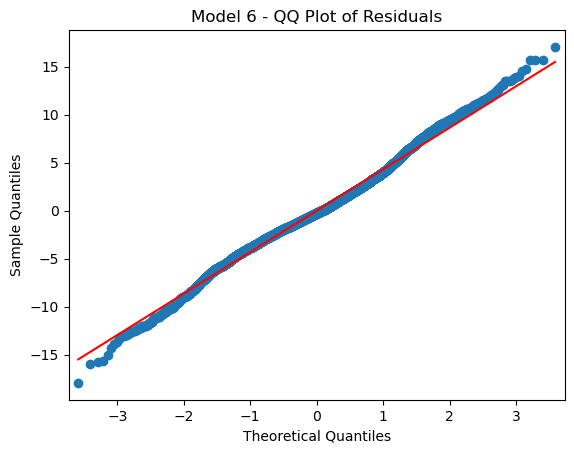

In [379]:
from statsmodels.graphics.gofplots import qqplot

#Run Omnibust test-Normality test # 's' indicates standardized line
qqplot(residuals, line='s')  
plt.title("Model 6 - QQ Plot of Residuals")
plt.show()

In [380]:
from scipy.stats import normaltest
#Run Omnibust test-Normality test

statistic, p_value = normaltest(residuals)
print(f"Omnibus test statistic: {statistic}")
print(f"Omnibus test p-value: {p_value}")

Omnibus test statistic: 77.96195384173474
Omnibus test p-value: 1.1770009789739989e-17


In [381]:
# Proceed with Panel data - Fixed & Random effect but check Hausman test first to choose the model
df3.reset_index(inplace=True)

df3.set_index(['BvDIDnumber','Index1'], inplace= True)
#Store the variables & define dependent and inpendent variables
exog_vars = ['ccc','Firm_growth','Financial_leverage', 'Liquidity','Short_term_financing','Firm_age_']
exog = sm.add_constant(df3[exog_vars])
endog = df3['ROS']

# Run Fixed Effects Model
model_fe = PanelOLS(endog, exog, entity_effects=True,)
fe_res = model_fe.fit()
print(fe_res)

# Run Random Effects Model
model_re = RandomEffects(endog, exog)
re_res = model_re.fit()
print("Random Effects Model Summary:")
print(re_res)

# Run Hausman Test

# Obtain the residuals covariance matrix
fe_cov = fe_res.cov
re_cov = re_res.cov

# Obtain the parameters estimated
fe_params = fe_res.params
re_params = re_res.params

# Calculate the difference in coefficients
diff = fe_params - re_params

# Calculate the difference in covariance matrices
cov_diff = fe_cov - re_cov

# Calculate the Hausman test statistic (chi-squared statistic)
chi2_stat = diff.dot(np.linalg.inv(cov_diff)).dot(diff)

# Calculate the degrees of freedom
df = len(fe_params) - 1

# Calculate the p-value
p_value = stats.chi2.sf(chi2_stat, df)

#Print the Hausman test results
print('Hausman Test:')
print('chi-squared statistic:', chi2_stat)
print('degrees of freedom :', df)
print('p-value:', p_value)


                          PanelOLS Estimation Summary                           
Dep. Variable:                    ROS   R-squared:                        0.1192
Estimator:                   PanelOLS   R-squared (Between):             -0.1655
No. Observations:                6011   R-squared (Within):               0.1192
Date:                Sun, Aug 13 2023   R-squared (Overall):             -0.0384
Time:                        23:37:22   Log-likelihood                -1.525e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      121.88
Entities:                         602   P-value                           0.0000
Avg Obs:                       9.9850   Distribution:                  F(6,5403)
Min Obs:                       1.0000                                           
Max Obs:                      10.0000   F-statistic (robust):             121.88
                            

In [382]:

df3.reset_index(inplace=True)

df3.set_index(['BvDIDnumber','Index1'], inplace= True)
#Store the variables & define dependent and inpendent variables
exog_vars = ['ccc','Firm_growth','Financial_leverage', 'Liquidity','Short_term_financing']
exog = sm.add_constant(df3[exog_vars])
endog = df3['ROS']

# Run Fixed Effects Model-Entity effect
model_fe = PanelOLS(endog, exog, entity_effects=True,)
fe_res = model_fe.fit()

# Run Fixed Effects Model-Time effect
model_te = PanelOLS(endog, exog, time_effects=True)
te_res = model_te.fit()


# Run Fixed Effects Model - Two-way effect
model_twe = PanelOLS(endog, exog, entity_effects=True, time_effects=True)
twe_res = model_twe.fit()

# Print the Fixed Effects Model-Entity effect
print("Entity Fixed Effects Model Summary:")
print(fe_res)

# Print the Fixed Effects Model-Time effect
print("\nTime Fixed Effects Model Summary:")
print(te_res)

# Print the Fixed Effects Model-Twoway effect
print("\nTwo-Way Fixed Effects Model Summary:")
print(twe_res)

Entity Fixed Effects Model Summary:
                          PanelOLS Estimation Summary                           
Dep. Variable:                    ROS   R-squared:                        0.1122
Estimator:                   PanelOLS   R-squared (Between):              0.1996
No. Observations:                6011   R-squared (Within):               0.1122
Date:                Sun, Aug 13 2023   R-squared (Overall):              0.1611
Time:                        23:37:22   Log-likelihood                -1.527e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      136.61
Entities:                         602   P-value                           0.0000
Avg Obs:                       9.9850   Distribution:                  F(5,5404)
Min Obs:                       1.0000                                           
Max Obs:                      10.0000   F-statistic (robust):            

In [383]:
# Store the above results to dataframe and then convert to excel 

# Get the coefficients
fe_coeff = fe_res.params
te_coeff = te_res.params
twe_coeff = twe_res.params

# Get R-squared
fe_r2 = fe_res.rsquared
te_r2 = te_res.rsquared
twe_r2 = twe_res.rsquared

# Calculate Adjusted R-squared directly
fe_adj_r2 = 1 - (1-fe_r2)*(fe_res.nobs-1)/(fe_res.nobs-len(exog_vars)-1)
te_adj_r2 = 1 - (1-te_r2)*(te_res.nobs-1)/(te_res.nobs-len(exog_vars)-1)
twe_adj_r2 = 1 - (1-twe_r2)*(twe_res.nobs-1)/(twe_res.nobs-len(exog_vars)-1)

# Get number of observations
fe_nobs = fe_res.nobs
te_nobs = te_res.nobs
twe_nobs = twe_res.nobs

# Create a DataFrame
df_results = pd.DataFrame({'Entity FE': fe_coeff, 'Time FE': te_coeff, 'Two-Way FE': twe_coeff})

# Append R-squared, Adjusted R-squared, and Number of observations
df_results = df_results.append(pd.Series({'Entity FE': fe_r2, 'Time FE': te_r2, 'Two-Way FE': twe_r2}, name='R-squared'))
df_results = df_results.append(pd.Series({'Entity FE': fe_adj_r2, 'Time FE': te_adj_r2, 'Two-Way FE': twe_adj_r2}, name='Adjusted R-squared'))
df_results = df_results.append(pd.Series({'Entity FE': fe_nobs, 'Time FE': te_nobs, 'Two-Way FE': twe_nobs}, name='Number of Obs.'))

print(df_results)
df_results.to_excel('model-6-fixed_effect.xlsx')

                        Entity FE      Time FE   Two-Way FE
const                    7.195255     6.570561     6.851692
ccc                      0.004000     0.014605     0.005745
Firm_growth              6.770101     8.659792     6.886113
Financial_leverage      -5.765780    -3.303199    -5.852665
Liquidity                0.353000     0.327798     0.495298
Short_term_financing    -4.547038    -6.716329    -4.583755
R-squared                0.112217     0.191293     0.117565
Adjusted R-squared       0.111478     0.190620     0.116830
Number of Obs.        6011.000000  6011.000000  6011.000000


/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_20580/833064353.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(pd.Series({'Entity FE': fe_r2, 'Time FE': te_r2, 'Two-Way FE': twe_r2}, name='R-squared'))
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_20580/833064353.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(pd.Series({'Entity FE': fe_adj_r2, 'Time FE': te_adj_r2, 'Two-Way FE': twe_adj_r2}, name='Adjusted R-squared'))
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_20580/833064353.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(pd.Series({'Entity FE': fe_nobs, 'Time FE': te_nobs, 

In [384]:
# Store the residuals of Two-way fixed effect into a variable 
residuals = twe_res.resids



# Run the Breusch-Pagan test-Heteroskedasticity test
bp_test = het_breuschpagan(residuals, exog)
bp_test_result = {'lagrange_multiplier_stat': bp_test[0], 'p-value': bp_test[1], 
                  'f-value': bp_test[2], 'f p-value': bp_test[3]}
print('Breusch-Pagan test:')
print(bp_test_result)


# Run the Durbin-Watson test-Heteroskedasticity test
dw_test_result = durbin_watson(residuals)
print('Durbin-Watson test:')
print(f'DW statistic: {dw_test_result}')

# Run the Breuch- Gofrey test-Serial correlation test

df3['residuals'] = twe_res.resids
df3['lag_residuals'] = df3.groupby(level='BvDIDnumber')['residuals'].shift(1)

# Drop NaN values from the dataframe
df3_cleaned = df3.dropna(subset=['residuals', 'lag_residuals'])

# Extract the dependent and independent variables from the cleaned dataframe
y = df3_cleaned['residuals']
X = df3_cleaned[['lag_residuals']]

# Using PanelOLS for fixed effect regression
model = PanelOLS(y, X, entity_effects=True, time_effects=True)
results = model.fit()

print('Breusch-Godfrey test:')
print(f'F-statistic: {results.f_statistic.stat}')
print(f'p-value: {results.f_statistic.pval}')




Breusch-Pagan test:
{'lagrange_multiplier_stat': 146.52948631513425, 'p-value': 7.312965969214652e-30, 'f-value': 30.00815037842191, 'f p-value': 3.1726384389997294e-30}
Durbin-Watson test:
DW statistic: 1.4612036852937118
Breusch-Godfrey test:
F-statistic: 591.7006233135561
p-value: 1.1102230246251565e-16


In [385]:
# Two-Way Fixed Effects Model with robust standard errors
model_twe_robust = PanelOLS(endog, exog, entity_effects=True, time_effects=True)
twe_res_robust = model_twe_robust.fit(cov_type='clustered', cluster_entity=True)
print('Two-Way Fixed Effects Model:\n', twe_res.summary)
print('Two-Way Fixed Effects Model (Robust):\n', twe_res_robust.summary)


Two-Way Fixed Effects Model:
                           PanelOLS Estimation Summary                           
Dep. Variable:                    ROS   R-squared:                        0.1176
Estimator:                   PanelOLS   R-squared (Between):              0.2094
No. Observations:                6011   R-squared (Within):               0.1118
Date:                Sun, Aug 13 2023   R-squared (Overall):              0.1664
Time:                        23:37:22   Log-likelihood                -1.519e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      143.75
Entities:                         602   P-value                           0.0000
Avg Obs:                       9.9850   Distribution:                  F(5,5395)
Min Obs:                       1.0000                                           
Max Obs:                      10.0000   F-statistic (robust):             143.7

In [386]:
print('Comparison of coefficient estimates:\n', 
      pd.DataFrame({'Model': twe_res.params, 'Model (Robust)': twe_res_robust.params}))

print('Comparison of standard errors:\n', 
      pd.DataFrame({'Model': twe_res.std_errors, 'Model (Robust)': twe_res_robust.std_errors}))

Comparison of coefficient estimates:
                          Model  Model (Robust)
const                 6.851692        6.851692
ccc                   0.005745        0.005745
Firm_growth           6.886113        6.886113
Financial_leverage   -5.852665       -5.852665
Liquidity             0.495298        0.495298
Short_term_financing -4.583755       -4.583755
Comparison of standard errors:
                          Model  Model (Robust)
const                 0.596037        1.031065
ccc                   0.002554        0.005046
Firm_growth           0.342041        0.500839
Financial_leverage    0.527621        0.824506
Liquidity             0.167902        0.310294
Short_term_financing  0.787071        1.393254


In [387]:
twe_r2_robust = twe_res_robust.rsquared
twe_adj_r2_robust = 1 - (1-twe_r2_robust)*(twe_res_robust.nobs-1)/(twe_res_robust.nobs-len(exog_vars)-1)
twe_adj_r2_robust

0.11682996447532523